In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
from functools import lru_cache

@lru_cache
def catalan(n):
	if n == 0: return 1
	return sum([catalan(i)*catalan(n-1-i) for i in range(n)])

def n_to_dyck(i, length=0):
	if length == 0:
		return []
	for k in range(1, length+1):
		D = catalan(k-1) 
		C = catalan(length-k)
		n = D*C
		if i<n:
			return [+1] + n_to_dyck(i%D, k-1) + [-1] + n_to_dyck(i//D, length-k)
		i -= n

	raise ValueError("i out of range(catalan(length))")

def dyck_to_n(dyck, first=False):
	if len(dyck) == 0:
		return 0
	
	# find the first occurrence of 0 in the cumulative sum
	cs = np.cumsum(dyck)
	k = np.where(cs == 0)[0][0]
	K = (k+1)//2
	L = len(dyck)//2

	n = 0
	for i in range(1, K):
		D = catalan(i-1)
		C = catalan(L-i)
		n += D*C

	if first:
		print(f"K={K} n={n} {dyck} ")

	# D = catalan(K-1)
	# C = catalan(len(dyck)//2-K)
	D = catalan(len(dyck[1:k])//2)
	C = catalan(len(dyck[k+1:])//2)

	d = dyck_to_n(dyck[1:k])
	c = dyck_to_n(dyck[k+1:])

	assert c < C
	assert d < D

	return n + d + c * D




n = 5
C_n = catalan(n)
for i in range(C_n):
	print(i, dyck_to_n(n_to_dyck(i, length=n)))

0 0
1 1
2 2
3 3
4 4
5 5
6 6
7 7
8 8
9 9
10 10
11 11
12 12
13 13
14 14
15 15
16 16
17 17
18 18
19 19
20 20
21 21
22 22
23 23
24 24
25 25
26 26
27 27
28 28
29 29
30 30
31 31
32 32
33 33
34 34
35 35
36 36
37 37
38 38
39 39
40 40
41 41


0 : [1, -1, 1, -1, 1, -1, 1, -1]
1 : [1, -1, 1, -1, 1, 1, -1, -1]
2 : [1, -1, 1, 1, -1, -1, 1, -1]
3 : [1, -1, 1, 1, -1, 1, -1, -1]
4 : [1, -1, 1, 1, 1, -1, -1, -1]
5 : [1, 1, -1, -1, 1, -1, 1, -1]
6 : [1, 1, -1, -1, 1, 1, -1, -1]
7 : [1, 1, -1, 1, -1, -1, 1, -1]
8 : [1, 1, 1, -1, -1, -1, 1, -1]
9 : [1, 1, -1, 1, -1, 1, -1, -1]
10 : [1, 1, -1, 1, 1, -1, -1, -1]
11 : [1, 1, 1, -1, -1, 1, -1, -1]
12 : [1, 1, 1, -1, 1, -1, -1, -1]
13 : [1, 1, 1, 1, -1, -1, -1, -1]


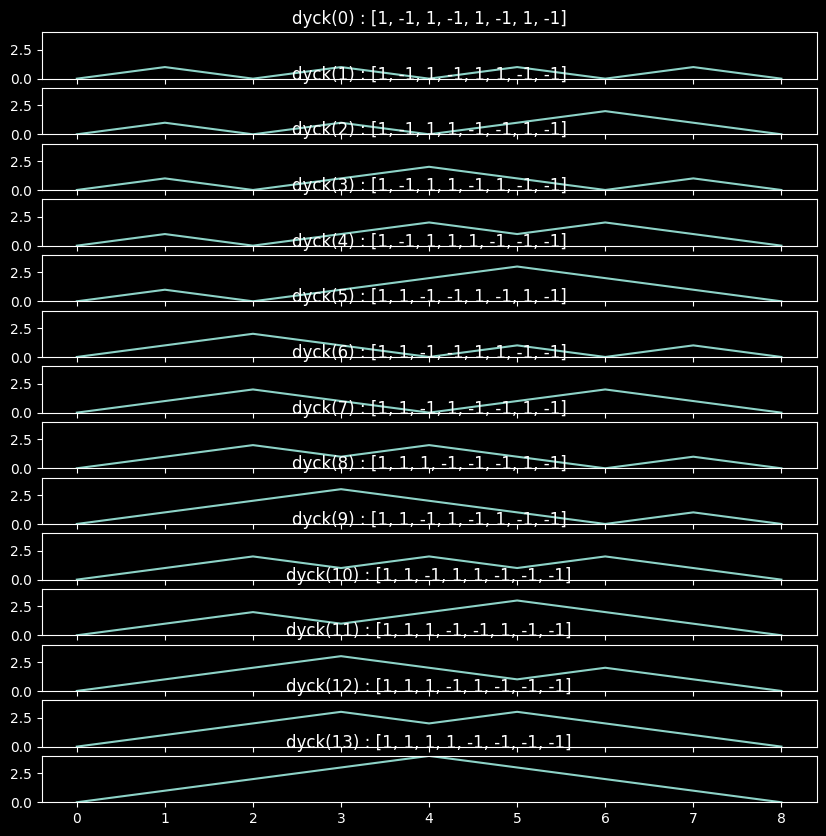

In [243]:
n = 4
C_n = catalan(n)
plt.figure(figsize=(10, 10))
for i in range(C_n):
	path = n_to_dyck(i, length=n)
	print(f"{i} : {path}")
	plt.subplot(C_n, 1, i+1)
	plt.title(f"dyck({i}) : {path}")
	plt.ylim(0, n)
	plt.plot([0] + list(np.cumsum(path)))